Binome : Touzari Maya et Astouati Nawel

## EXERCICE 1:


In [5]:
import time
import matplotlib.pyplot as plt
import random
import math

#1.a
def my_gcd(a, b):
    if b == 0:
        return a
    else:
        r = a % b
        return my_gcd(b, r)

#fonction supplementaire pour my_inverse
def bezout(a, b):
    """
        Entrée : a, b entiers
        Sorties : u, v entiers tels que a*u + b*v = r
    """
    r, u = a, 1
    rp, up = b, 0
    while rp != 0:
        q = r // rp
        rs, us = r, u
        r, u = rp, up
        rp, up = (rs - q * rp), (us - q * up)
    return r, u

#1.b
def my_inverse(a, N):

    pgcd, u = bezout(a, N)
    if pgcd == 1:
        return u
    else:
        return -1

#1.d
def my_expo_mod(g, n, N):

    n_ = (bin(n)[2:])[::-1]
    l = len(n_)
    h = 1
    for i in range(l-1, -1, -1):
        h = (h*h) % N
        ai = int(n_[i])
        if ai == 1:
            h = (h * g) % N
    return h
print("quelques exemples d'execution de la fonction my_expo_mod")
print(my_expo_mod(4, 13, 497))
print(my_expo_mod(2, 10, 500))
print(my_expo_mod(3, 13, 497))

quelques exemples d'execution de la fonction my_expo_mod
445
24
444


graphe de la complexité temporelle de la fonction my_inverse
complexité temporelle (log(n))2


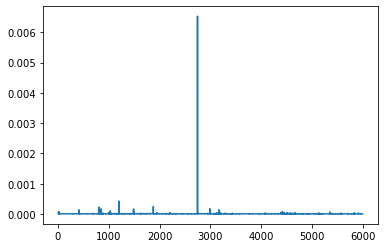

In [2]:
def dessiner_courbe_mygcd():
    gaps = []
    N_ = []

    for N in range(3, 6000):
        N_.append(N)
        start = time.time()
        my_gcd(random.randint(2, N), random.randint(2, N))
        gaps.append(time.time() - start)

    plt.plot(N_, gaps)
    plt.show()
    
def dessiner_courbe_myinverse():
    gaps = []
    N_ = []

    for N in range(3, 6000):
        N_.append(N)
        start = time.time()
        my_inverse(random.randint(2, N),N)
        gaps.append(time.time() - start)

    plt.plot(N_, gaps)
    plt.show()
print("graphe de la complexité temporelle de la fonction my_inverse")
print("complexité temporelle (log(n))2")
dessiner_courbe_myinverse()

graphe de la complexité temporelle de la fonction my_gcd


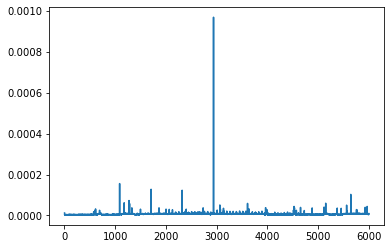

In [3]:
print("graphe de la complexité temporelle de la fonction my_gcd")
dessiner_courbe_mygcd()

La complexité temporelle théorique des deux algorithmes pgcd et inverse est en O($log(n)^2$)

## EXERCICE 2:

In [6]:
#2.a
#2.b compléxité en o(racine(n))
def first_test(N):
    for i in range(2,math.floor(math.sqrt(N))+1):
        if N%i==0:
            return False
    return True
#2.c
def nb_nombres_premier(n):
    cpt=0
    for i in range(2, n):
        if(first_test(i)):
            cpt=cpt+1
    return cpt
print("nombre de nombres premiers inférieurs à 10^5 est :",nb_nombres_premier(10**5))
 

nombre de nombres premiers inférieurs à 10^5 est : 9592


In [5]:
def carre_parfait(n):
    if int(math.sqrt(n))*int(math.sqrt(n))==n:
            return True
    return False
def list_diviseurs(n):
    l=[]
    for i in range(2,math.floor(n/2)):
        if n%i==0:
            l.append(i)
    return l

def gen_carmichael(n):
    l=[]
    for nb in range(2,n):
        if nb%2==0:
            continue
        liste_diviseurs_nb=list_diviseurs(nb)
        if(len(liste_diviseurs_nb)==0):
            continue
        b=True
        i=0
        if(carre_parfait(nb)):
            b=False
        while i<len(liste_diviseurs_nb) and b==True:
            if(carre_parfait(liste_diviseurs_nb[i])):
                b=False            
            if(first_test(liste_diviseurs_nb[i])):
                if (nb-1)%(liste_diviseurs_nb[i]-1)!=0:
                    b=False
            i=i+1
        if b==True:
            l.append(nb)
    return l    
s=time.time()
print("liste des nombres de carmichael inférieur à 10^5",gen_carmichael(10**5))
s=time.time()-s
print("la fonction s'execute en",s,"secondes")

liste des nombres de carmichael inférieur à 10^5 [561, 1105, 1729, 2465, 2821, 6601, 8911, 10585, 15841, 29341, 41041, 46657, 52633, 62745, 63973, 75361]
la fonction s'execute en 120.21648812294006 secondes


In [26]:
#fonction qui retourne True si l'entier en entrée est un nombre de carmichael selon korselt False sinon
def carmichael(nb):
    if nb%2==0:
            return False
    liste_diviseurs_nb=list_diviseurs(nb)
    if(len(liste_diviseurs_nb)==0):
        return False
    i=0
    if(carre_parfait(nb)):
        return False
    while i<len(liste_diviseurs_nb):
        if(carre_parfait(liste_diviseurs_nb[i])):
            return False      
        if(first_test(liste_diviseurs_nb[i])):
            if (nb-1)%(liste_diviseurs_nb[i]-1)!=0:
                return False
        i=i+1
    return True 
#fonction qui genere n nombres premiers en faisant appel a la fontion first_test
def generer_nb_premiers(n):
    l=[]
    for i in range(2,n):
        if first_test(i):
            l.append(i)
    return l

#dans cette fonction on genere des nombres premiers et on cherche le plus grand nombre de carmichael à 3 facteurs en 5 min 
# d'ou la présence du time qui permet de s'arreter quand on dépasse 5min 
def gen_carmichael3(k1):
    l=generer_nb_premiers(200)
    max=0
    s=time.time()
    for i in range(0,len(l)):
        for j in range(i+1,len(l)-1):
            for k in range(j+1,len(l)-2):
                nb=(l[i])*(l[j])*(l[k])
                if time.time()-s > 300 :
                    return max
                if carmichael(nb) and int(math.log2(nb))+1==k1:
                            if max<nb:
                                max=nb
for i in range(10,20):    
    print("pour une longueur binaire de ", i, "resultat pour 5 minutes", gen_carmichael3(i))

pour une longueur binaire de  10 resultat pour 5 minutes 561
pour une longueur binaire de  11 resultat pour 5 minutes 1729
pour une longueur binaire de  12 resultat pour 5 minutes 2821
pour une longueur binaire de  13 resultat pour 5 minutes 6601
pour une longueur binaire de  14 resultat pour 5 minutes 15841
pour une longueur binaire de  15 resultat pour 5 minutes 29341
pour une longueur binaire de  16 resultat pour 5 minutes 52633
pour une longueur binaire de  17 resultat pour 5 minutes 0
pour une longueur binaire de  18 resultat pour 5 minutes 0
pour une longueur binaire de  19 resultat pour 5 minutes 0


La fonction gen_carmichael3 retourne 0 lorsque elle prends plus de 5min pour generer un nombre de carmichael de longueur binaire k. On remarque que c'est le cas à partir de 17. On a commencé à partir de 10 car le plus petit nombre de carmichael est 561 et sa longueur binaire est 10.

2-g<br>
1.Soit n un nombre de Carmichael de la forme pqr avec p < q < r trois nombres premiers. En utilisant le critere de Korselt, <br>
montrons qu’il existe un entier $h ∈ {2, . . . , p − 1}$ tel que $(pq − 1) = h(r − 1).$<br>

On a : $r - 1$ divise $n - 1$ ( critère de Korselt)<br>
    donc il existe un entier $k$ tel que : $n - 1 = k(r - 1)$<br>
    donc : <br>
>$n - 1 = pqr – 1 $ <br>
>&emsp;&emsp;$= pq(r - 1) + pq - 1 $ <br>
>&emsp;&emsp;$= k(r-1)$ <br>

donc<br>
>$pq – 1 = k(r-1)- pq(r - 1)$ <br>
>&emsp;&emsp;&emsp;&emsp;$= (k - pq)(r - 1)$ <br>
           
donc il existe un entier $h = k - pq$ tel que $(pq − 1) = h(r − 1)$ <br>

2.Montrer qu’il existe un entier k tel que $(hk − p2)(q − 1) = (p + h)(p − 1)$.<br>
>$(p + h)(p − 1) = p^2 + hp - p - h + p^2q - p^2q$ <br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + hp - p - h + p^2q  $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + hp - h + p(qr - 1) $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + hp - h + ph(r - 1) $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + h(p - 1 + p(r - 1)) $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + h(pr - 1) $ (1)<br>

D'autre part on a :<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ n - 1 = pqr - 1 $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= pr (q - 1) + pr - 1$<br><br>

Donc :<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$pr - 1 = pqr - 1 - pr (q - 1) $<br><br>

>Comme $ q - 1 $ divise $ n - 1$ donc $ q - 1 $ divise $ pqr - 1 $ <br>
>Il existe alors un entier a tel que  $ pqr - 1 = a (q - 1)$<br><br>

Ce qui donne:<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$pr - 1 = pqr - 1 - pr (q - 1) = a (q - 1) - pr (q - 1) = (a - pr)(q - 1)$<br><br>

En remplaçant dans la formule (1)<br>

>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= - p^2(q - 1) + h(pr - 1) = - p^2(q - 1) + h(a - pr)(q - 1) $<br>
>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= (h(a - pr) - p^2 ) (q - 1) $<br>

Donc il existe un entier $k = (a - pr)$ tel que $(hk − p2)(q − 1) = (p + h)(p − 1)$




3. Afin de conclure qu’il n’existe qu’un nombre fini de nombres de Carmichael de la forme $pqr$ avec $p < q < r$ trois nombres premiers pour $p$ fixe, il suffit de trouver une borne pour $q$ et une borne pour $r$ en fonction de $p$ qui est fixé.<br>

Borne pour $q$:
> On sait que $q-1$ divise $(p + h)(p - 1)$ (2g.2) donc on a que $q-1 <= (p + h)(p - 1)$ mais on sait que $h <= p - 1$ (2.g.1) donc $h < p$ <br>
> On peut remplacer $h$ par $p$ et on en déduit que $ q <= 2p(p - 1) + 1$<br><br>

Borne pour $r$:<br>
> $r - 1$ divise $pq - 1$ donc $r - 1 <= pq - 1 $ <br>
Or $q$ est borné par $ q <= 2p(p - 1) + 1$<br>
Donc : $r <= p(2p(p - 1) + 1)  $

In [31]:
def generer_p(p):
    l=generer_nb_premiers(200)
    q = 0
    res = []
    while q < len(l) and  l[q] <= 2*p*(p-1)+1 :
            r = q + 1
            while r < len(l) and l[r] <= p*(2*p*(p-1)+1):
                nb=(p*(l[r])*(l[q]))
                if carmichael(nb):
                    res.append(nb)
                r = r + 1
            q = q + 1
    return res
print("Les nombres de Carmichael de la forme 3qr :",generer_p(3))
print("Les nombres de Carmichael de la forme 5qr :",generer_p(5))
                

Les nombres de Carmichael de la forme 3qr : [561]
Les nombres de Carmichael de la forme 5qr : [1105, 2465, 10585]


## EXERCICE 3:

In [13]:
# compose = 0, premier possible 1

def gen_compose(n):
    l = []
    for i in range(n):
        a = random.randint(2, 1000)
        b = random.randint(2, 1000)
        l.append(a*b)
    return l

def gen_alea(n, N):
    l = []
    for i in range(n):
        a = random.randint(2, N)
        l.append(a)
    return l

def test_fermat(n, T):
    for i in range(T):
        a = random.randint(2, n-1)
        b = my_expo_mod(a, n-1, n)
        if b != 1:
            return 0
    return 1

def test():
    carmichael = gen_carmichael(100000)
    compose = gen_compose(100000)
    alea = gen_alea(1000, 100000)

    result_carmichael = []
    result_compose = []
    result_alea = []

    erreur_carmichael = 0
    erreur_compose = 0
    erreur_alea = 0

    for n in carmichael:
        result1 = test_fermat(n, 10)
        result_carmichael.append(result1)
        if result1 == 1:
            erreur_carmichael = erreur_carmichael + 1

    for n in compose:
        result2 = test_fermat(n, 10)
        result_compose.append(result2)
        if result2 == 1:
            erreur_compose = erreur_compose + 1

    for n in alea:
        result3 = test_fermat(n, 10)
        result_alea.append(result3)
        if first_test(n) != result3:
            erreur_alea = erreur_alea + 1


    print("Carmichael:", erreur_carmichael, "erreurs sur ",  len(carmichael)," avec test sur 10 bases")
    print("Compose:", erreur_compose, "erreurs  sur ",  len(compose))
    print("Alea:", erreur_alea, " erreurs sur ",  len(alea))

test()


Carmichael: 2 erreurs sur  16  avec test sur 10 bases
Compose: 3 erreurs  sur  100000
Alea: 0  erreurs sur  1000


In [15]:
def proba(T):
    erreur = 0
    for n in range(3, (10**5)+1):
        result = test_fermat(n, T)
        if first_test(n) != result:
            erreur = erreur + 1
    return erreur/10**5
print("probabilité d'erreur :")
print("Avec 5 bases", proba(5))
print("Avec 10 bases", proba(10))
print("Avec 20 bases", proba(20))

probabilité d'erreur :
Avec 5 bases 3e-05
Avec 10 bases 3e-05
Avec 20 bases 0.0


## EXERCICE 4:

In [2]:
#False composé True premier
def test_miller_rabin(n,T):
    if n==2 or n==3:
        return True
    if n%2==0:
        return False
    m=n-1
    h=0
    while(m%2==0):
        h+=1
        m=m/2
    m=int(m)
    for i in range(T):
        a=random.randint(2,n-2)
        b=my_expo_mod(a,m,n)
        if b!=1 and b!=n-1:
            for j in range(h-1):
                k=0
                if b!=n-1 and b**2%n==1:
                    return False
                if b==n-1:
                    break
                b=b**2%n
            if b!=n-1:
                return False
    return True

In [20]:
def test2():
    carmichael = gen_carmichael(100000)
    compose = gen_compose(100000)
    alea = gen_alea(1000, 100000)

    result_carmichael = []
    result_compose = []
    result_alea = []

    erreur_carmichael = 0
    erreur_compose = 0
    erreur_alea = 0

    for n in carmichael:
        result1 = test_miller_rabin(n, 10)
        result_carmichael.append(result1)
        if result1 == 1:
            erreur_carmichael = erreur_carmichael + 1

    for n in compose:
        result2 = test_miller_rabin(n, 10)
        result_compose.append(result2)
        if result2 == 1:
            erreur_compose = erreur_compose + 1

    for n in alea:
        result3 = test_miller_rabin(n,10)
        result_alea.append(result3)
        if first_test(n) != result3:
            erreur_alea = erreur_alea + 1


    print("Carmichael:", erreur_carmichael, "erreurs sur ",  len(carmichael))
    print("Compose:", erreur_compose, "erreurs  sur ",  len(compose))
    print("Alea:", erreur_alea, " erreurs sur ",  len(alea))

test2()

Carmichael: 0 erreurs sur  16
Compose: 0 erreurs  sur  100000
Alea: 0  erreurs sur  1000


In [8]:
def proba2(T):
    erreur = 0
    for n in range(3, (10**5)+1):
        result = test_miller_rabin(n, T)
        if first_test(n) != result:
            erreur = erreur + 1
    return erreur/10**5
print("probabilité d'erreur :")
print("Avec 2 bases", proba2(2))
print("Avec 5 bases", proba2(5))
print("Avec 10 bases", proba2(10))
print("Avec 20 bases", proba2(20))
print("Avec 30 bases", proba2(30))



probabilité d'erreur :
Avec 2 bases 1e-05
Avec 5 bases 0.0
Avec 10 bases 0.0
Avec 20 bases 0.0
Avec 30 bases 0.0


In [25]:
def gen_rsa(t): 
    p=-1
    q=-1
    for i in range(2**(t-1),(2**t)+1):
        if test_miller_rabin(i,64)==True:
            p=i
            break
    for j in range(p+1,(2**t)+1):
        if test_miller_rabin(j,64)==True:
            q=j
            break
    if q*p < 0 :
        return -1
# Si les deux nombres ou un des deux n'existe pas, la fonction retourne -1
    return p*q,p,q

print(gen_rsa(5))

(323, 17, 19)
